# Imports

In [31]:
# data handling
import pandas as pd
import numpy as np

# data visualization
%matplotlib inline
import seaborn as sns
import missingno as msno


# Read Data

In [2]:
diabetes_raw = pd.read_csv('..\\data\\raw\\diabetic_data.csv')

In [3]:
diabetes_raw.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

# Exploratory Data Analysis

### Overview

In [4]:
diabetes_raw.shape

(101766, 50)

In [5]:
diabetes_raw.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

In [6]:
diabetes_raw.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
diabetes_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
for col in diabetes_raw.columns:
    print(col," unique values - ", diabetes_raw[col].unique())
    print("############################################\n")

encounter_id  unique values -  [  2278392    149190     64410 ... 443854148 443857166 443867222]
############################################

patient_nbr  unique values -  [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
############################################

race  unique values -  ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
############################################

gender  unique values -  ['Female' 'Male' 'Unknown/Invalid']
############################################

age  unique values -  ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
############################################

weight  unique values -  ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
############################################

admission_type_id  unique values -  [6 1 2 3 4 5 8 7]
############################################

discharge_disposition_id  unique

### Missing Data

Missing values in this dataset are represented by ‘?’, which is not a standard missing value format. Only very few of the columns have missing values. These are:

‘race', 'weight', 'payer_code', 'medical_specialty', 'diag_2', 'diag_3'

In [9]:
diabetes_raw.replace("?", np.nan, inplace=True)

<AxesSubplot: >

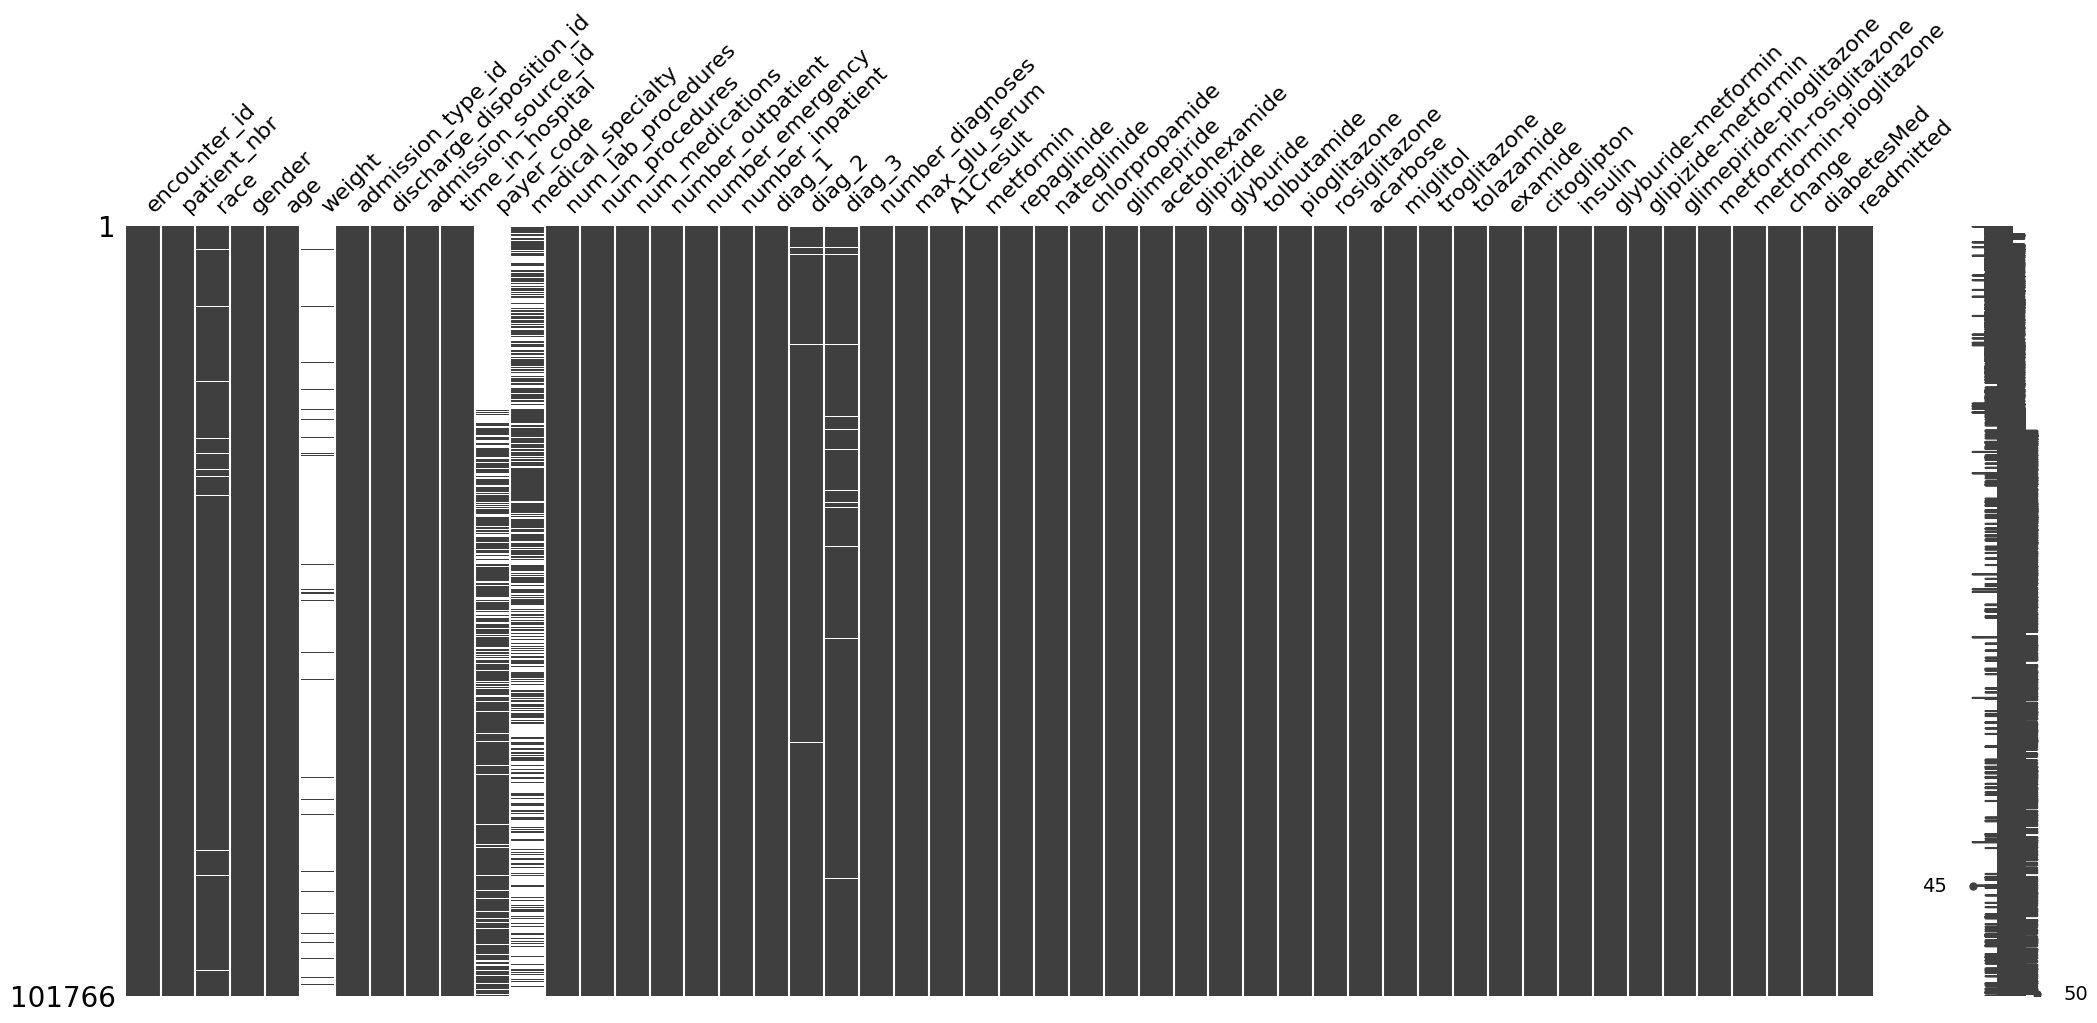

In [10]:
msno.matrix(diabetes_raw)

### Análise de variáveis

In [21]:
def plot_freq(col):
    var_counts = diabetes_raw[col].value_counts()
    var_counts_df = pd.DataFrame({'value': var_counts.index, 
                                 'count': var_counts.values, 
                                 'frequency (%)': var_counts.values / len(diabetes_raw) * 100})
    
    return var_counts_df

#### alta cardinalidade

In [22]:
import matplotlib.pyplot as plt

plot_freq(col="diag_1")

value  count  frequency (%)
0     428   6862       6.742920
1     414   6581       6.466796
2     786   4016       3.946308
3     410   3614       3.551284
4     486   3508       3.447124
..    ...    ...            ...
711   817      1       0.000983
712    61      1       0.000983
713   148      1       0.000983
714   870      1       0.000983
715   V51      1       0.000983

[716 rows x 3 columns]

In [25]:
plot_freq(col="diag_2")

value  count  frequency (%)
0     276   6752       6.634829
1     428   6662       6.546391
2     250   6071       5.965647
3     427   5036       4.948608
4     401   3736       3.671167
..    ...    ...            ...
743   232      1       0.000983
744   908      1       0.000983
745    52      1       0.000983
746  E817      1       0.000983
747   927      1       0.000983

[748 rows x 3 columns]

In [26]:
plot_freq(col="diag_3")

value  count  frequency (%)
0     250  11555      11.354480
1     401   8289       8.145157
2     276   5175       5.085195
3     428   4577       4.497573
4     427   3955       3.886367
..    ...    ...            ...
784   657      1       0.000983
785   684      1       0.000983
786   603      1       0.000983
787  E826      1       0.000983
788   971      1       0.000983

[789 rows x 3 columns]

In [27]:
plot_freq(col="medical_specialty")

value  count  frequency (%)
0                   InternalMedicine  14635      14.381031
1                   Emergency/Trauma   7565       7.433720
2             Family/GeneralPractice   7440       7.310890
3                         Cardiology   5352       5.259124
4                    Surgery-General   3099       3.045221
..                               ...    ...            ...
67                      Perinatology      1       0.000983
68                   Neurophysiology      1       0.000983
69              Psychiatry-Addictive      1       0.000983
70     Pediatrics-InfectiousDiseases      1       0.000983
71  Surgery-PlasticwithinHeadandNeck      1       0.000983

[72 rows x 3 columns]

In [28]:
plot_freq(col="examide")

value   count  frequency (%)
0    No  101766          100.0

In [29]:
plot_freq(col="citoglipton")

value   count  frequency (%)
0    No  101766          100.0

### Duplicated values in Patient_nbr

In [24]:
diabetes_raw['patient_nbr'].duplicated().sum()

30248

### Output class

<AxesSubplot: >

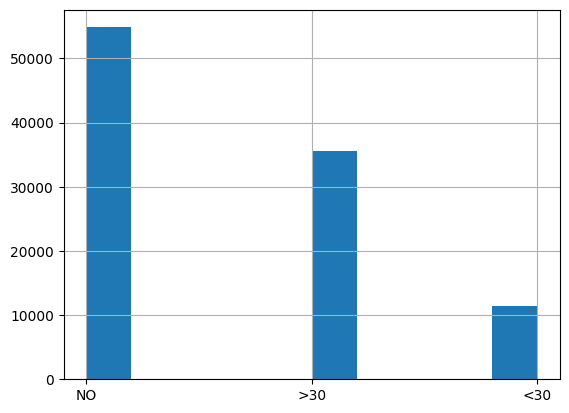

In [30]:
diabetes_raw['readmitted'].hist()

### Variables analysis

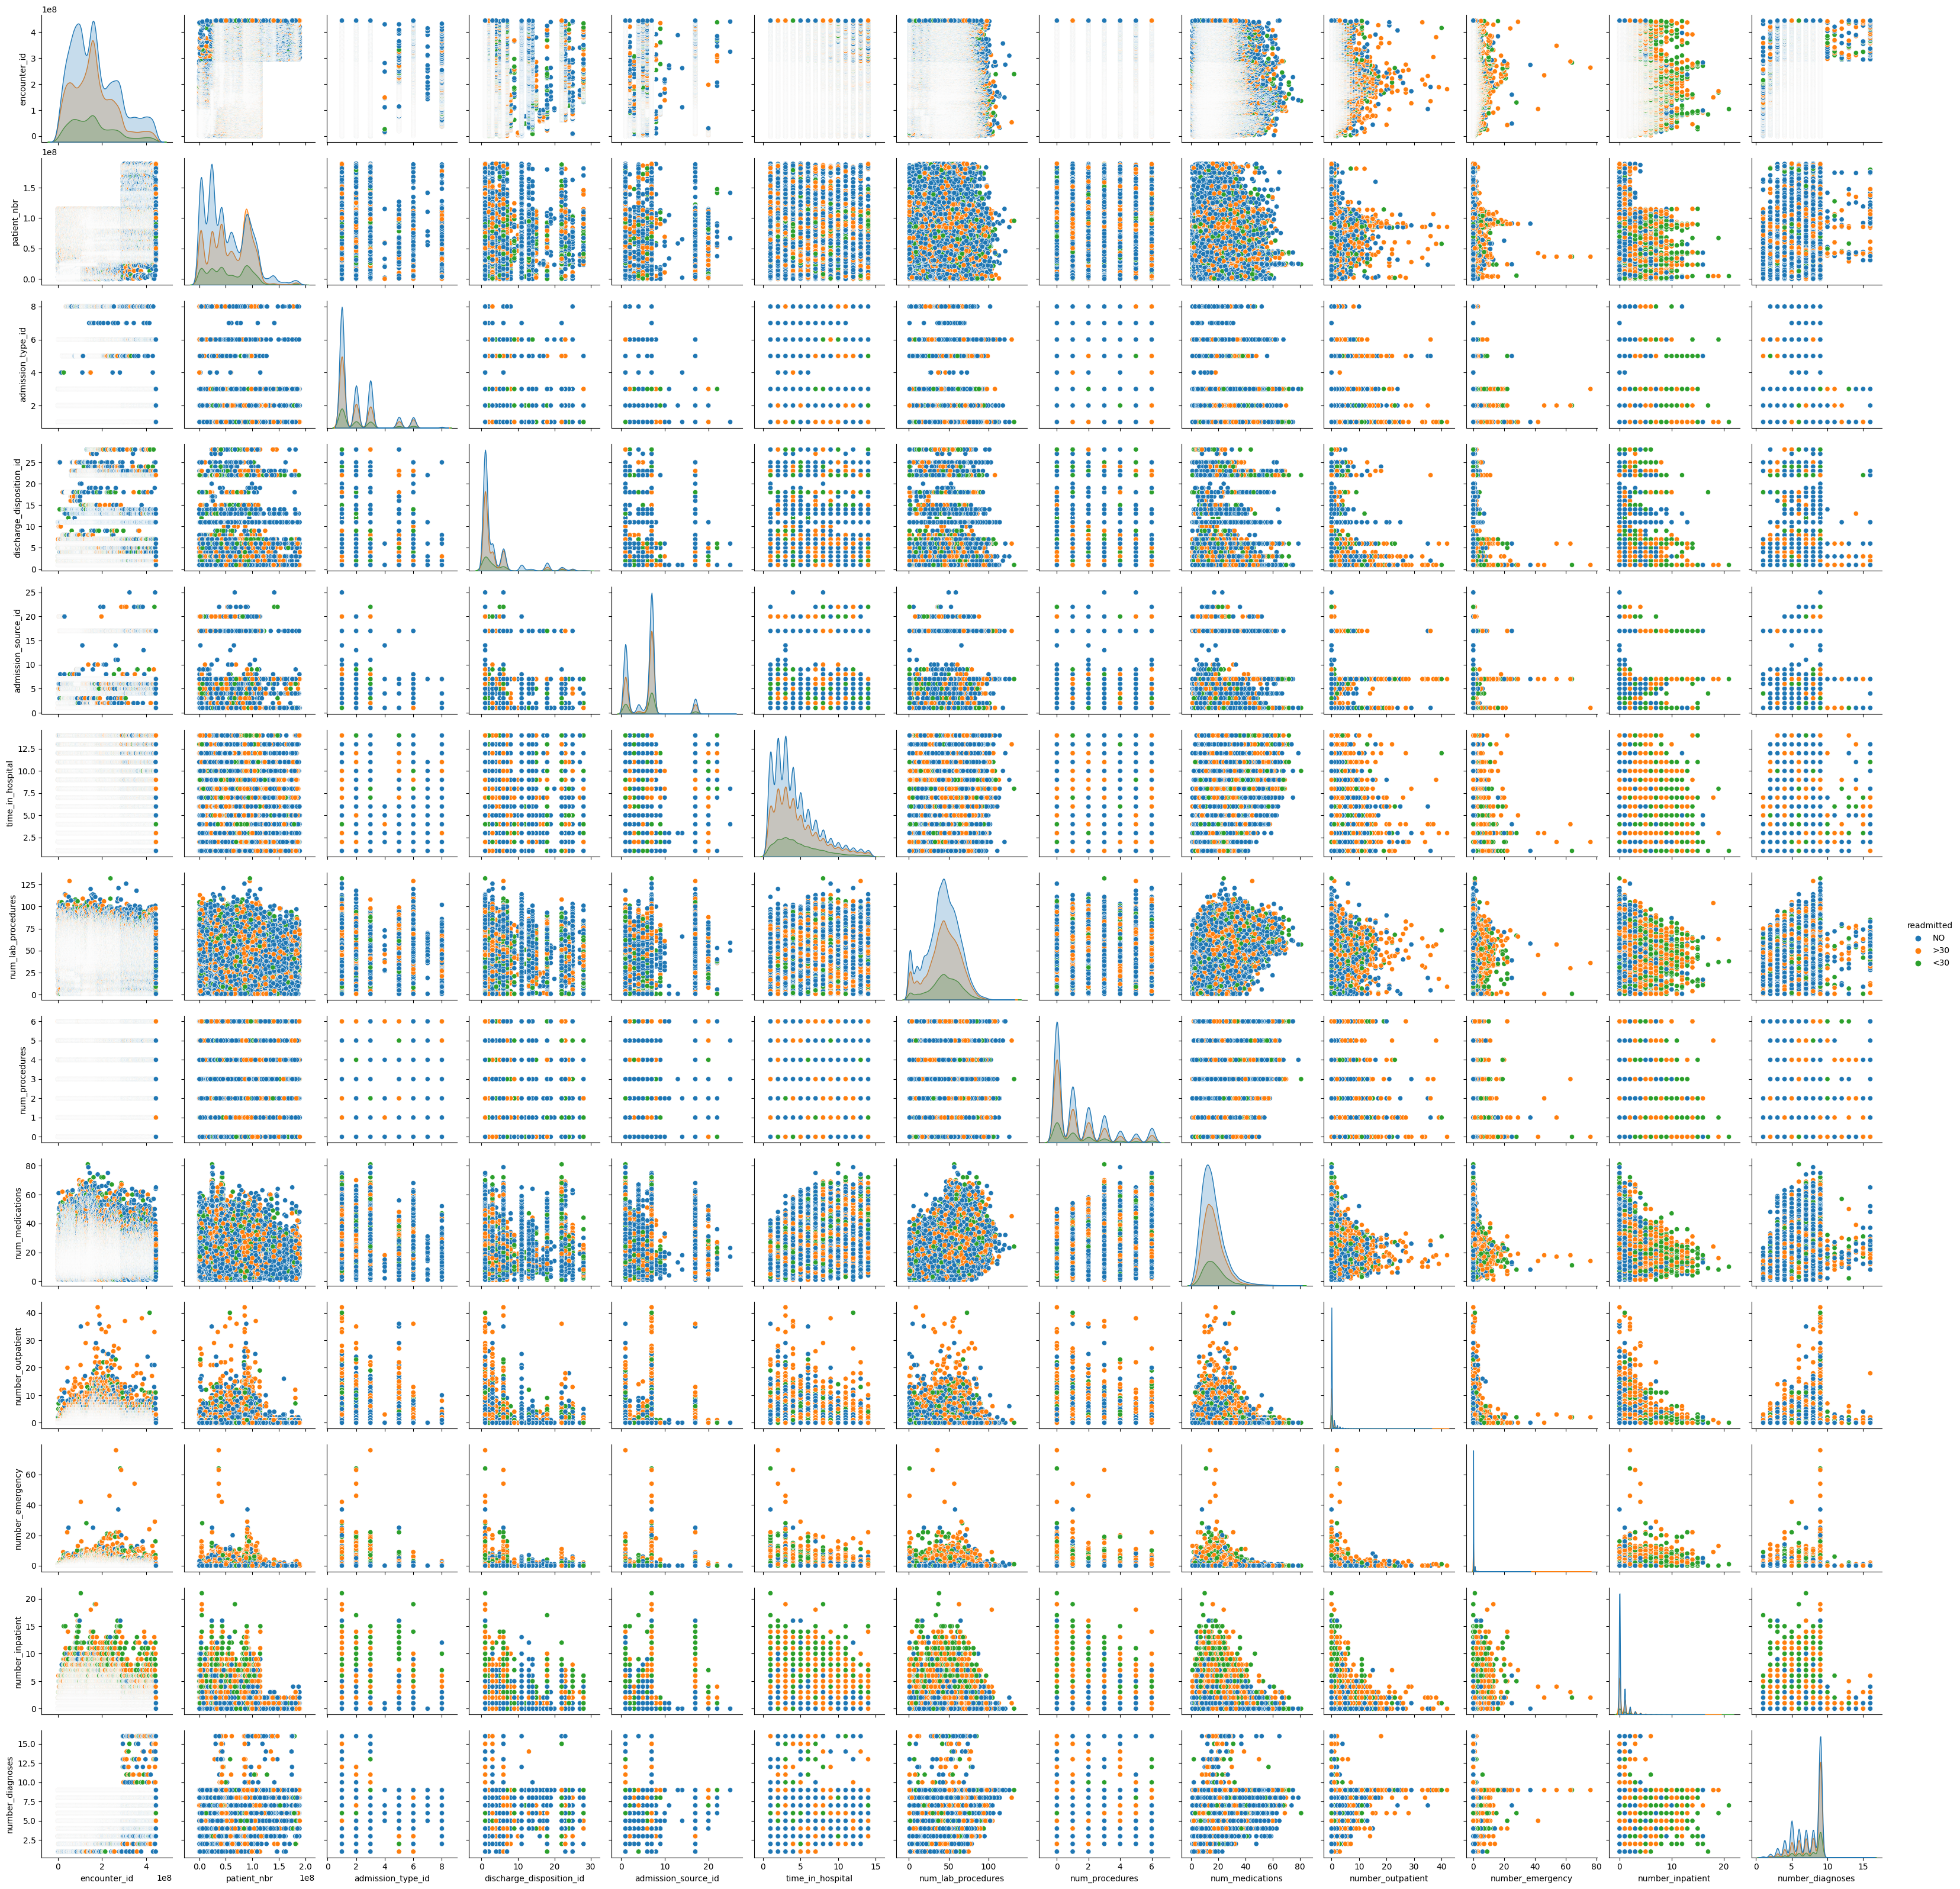

In [10]:


sns.pairplot(diabetes_raw, hue="readmitted")

# Pandas Profiling Report

In [20]:
from pandas_profiling import ProfileReport

prof = ProfileReport(diabetes_raw)
prof.to_file(output_file='../reports/EDA.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]